Multivariate Linear Regression without scaling
 

In [2]:
import numpy as np
import pandas as pd

LOAD THE DATASET

In [6]:
dataset=pd.read_csv('./50_Startups.csv')


DATA WRANGLING :

No na's in the data but since we have categorical data "State" we will encode it to dummy variables, since whe have three labels viz California, New York, Florida
we need 3-1=2 dummy variables
such that D0=California and D1=New York

In [7]:
dataset['D0']=dataset['State'].replace({"California":1,"Florida":0,"New York":0})
dataset['D1']=dataset['State'].replace({"California":0,"Florida":0,"New York":1})
dataset['ones']= np.ones(len(dataset)).reshape(len(dataset),1)

View the changes

In [8]:
print(dataset)

    R&D Spend  Administration  Marketing Spend  ... D0  D1  ones
0   165349.20       136897.80        471784.10  ...  0   1   1.0
1   162597.70       151377.59        443898.53  ...  1   0   1.0
2   153441.51       101145.55        407934.54  ...  0   0   1.0
3   144372.41       118671.85        383199.62  ...  0   1   1.0
4   142107.34        91391.77        366168.42  ...  0   0   1.0
5   131876.90        99814.71        362861.36  ...  0   1   1.0
6   134615.46       147198.87        127716.82  ...  1   0   1.0
7   130298.13       145530.06        323876.68  ...  0   0   1.0
8   120542.52       148718.95        311613.29  ...  0   1   1.0
9   123334.88       108679.17        304981.62  ...  1   0   1.0
10  101913.08       110594.11        229160.95  ...  0   0   1.0
11  100671.96        91790.61        249744.55  ...  1   0   1.0
12   93863.75       127320.38        249839.44  ...  0   0   1.0
13   91992.39       135495.07        252664.93  ...  1   0   1.0
14  119943.24       15654

Create a new dataframe to work with.
the old one can be used for reference if needed

In [19]:
df=dataset[['ones','R&D Spend', 'Administration', 'Marketing Spend','D0', 'D1', 'Profit']]
y_features= df[df.columns[-1]]
x_features=df[df.columns[:-1]]
#pass a list of the column names to be extracted from thr original dataframe and the order in which they must appear

SHOW THE RESULTS

In [ ]:
print(df)

In [ ]:
print(y_features)

In [ ]:
print(x_features)

Let's see how the dataframe column values fluctuate

In [11]:
print("Max Features:\n ")
print(df.max(axis=0))
print("\n\nMin Features: \n")
print(df.min(axis=0))

Max Features:
 
ones                    1.00
R&D Spend          165349.20
Administration     182645.56
Marketing Spend    471784.10
D0                      1.00
D1                      1.00
Profit             192261.83
dtype: float64


Min Features: 

ones                   1.00
R&D Spend              0.00
Administration     51283.14
Marketing Spend        0.00
D0                     0.00
D1                     0.00
Profit             14681.40
dtype: float64


multi-variate linear model is : 

y= Theta0 + Theta1*x1 + Theta2*x2 + Theta3*x3 +.....

in vector notation:
Theta(transpose)*xi (from 1 to n) + Theta0

Gradient Descent is given by:
min(theta) fot J(Theta0,Theta1,..)
where j= ((yp=y)**2/2m)

Note: Theta values must be updated simultaneously and then plugged in

Note: The model requires you to set the learning rate 
it is an iterative process (if the rate is too high you will see inf. or nan as MSE: valued if its is too low you will see some value but the graph will be a straight line. A right learning rate & iteration combo produces a decreasing exponent)

In [73]:
def fit(x_features,y_responses,alpha=0.000000000001,iter=100):
 theta=np.ones(x_features.shape[1])
 rl=[]
 for i in range(iter):
  yp=(x_features*theta).sum(axis=1)
  rl.append([(yp-y_responses).sum()])
  for column in range(theta.shape[0]):
    difference=(x_features[x_features.columns[column]]*(yp-y_responses)).sum()
    theta[column]= theta[column] - (alpha*difference)/y_responses.shape[0]
 MSE=(((yp-y_responses)**2)/y_responses.shape[0]).sum()
 print("MSE: ",MSE)
 return (rl , iter, theta)
y=fit(x_features,y_responses)

MSE:  268737835.4457357


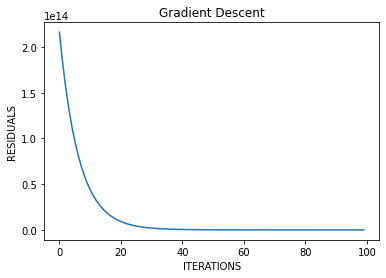

Theta values are:  [0.99999603 0.66214674 0.47686476 0.03273547 0.99999875 0.99999867]


In [74]:
import matplotlib.pyplot as plt
x=np.arange(y[1])
plt.plot(x,np.array(y[0])**2)
plt.xlabel("ITERATIONS")
plt.ylabel("RESIDUALS")
plt.title("Gradient Descent")
plt.show()
print("Theta values are: ", end=" ")
print(y[2])

In [75]:
# PREDICT USING THE MODEL
def predict(x,th):
  return (th.T*x).sum()
x=[ 1.0,162597.70,151377.59,393898.53,1,1]
print("%.5f"%predict(x,y[2]))

192747.62948
